# Task 4 - Decision Tree

### The Spark Foundation - Mohit Agrawal

### For the given 'IRIS' dataset, create the Decision Tree Classifier and visualize it graphically. The Purpose is if we feed any new data to this classifier, ii would be able to right class accordingly.

## Import libraries 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Read Data

In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


##### Is there any missing value? - NO

In [ ]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Categorical to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder

df['Species'] = LabelEncoder().fit_transform(df['Species'])

In [ ]:
df['Species'].unique()

array([0, 1, 2])

### Outlier Detection

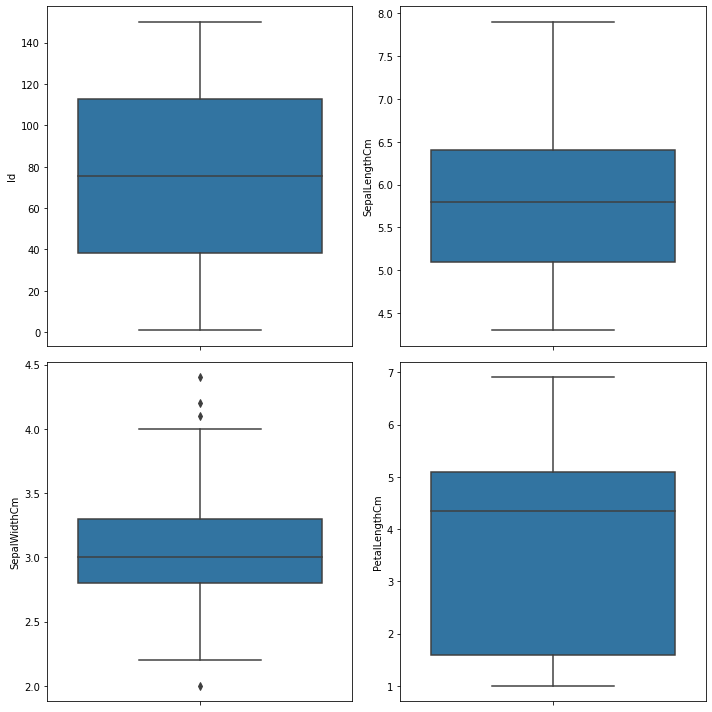

In [ ]:
plt.figure(figsize=(10,10))
plotnumber = 1

for col in df.columns:
    if plotnumber < 5:
        
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(y=df[col])
    plotnumber +=1
plt.tight_layout()

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Data Visualization

In [ ]:
for col in df.columns[1:-1]:
    print(col)

SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm


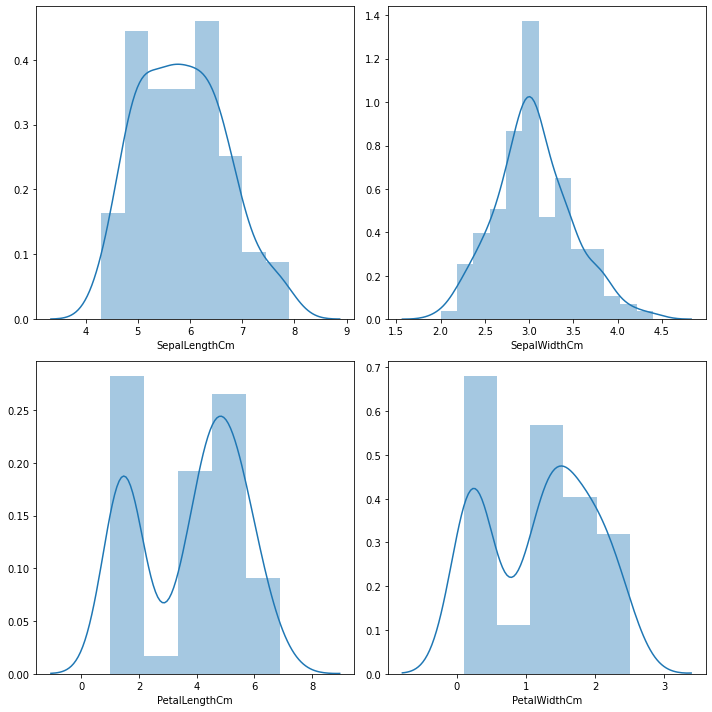

In [ ]:
### distribution plot

plt.figure(figsize=(10,10))
plotnumber = 1

for col in df.columns[1:-1]:
    if plotnumber < 5:
        plt.subplot(2,2, plotnumber)
        sns.distplot(df[col])
    plotnumber +=1
plt.tight_layout()

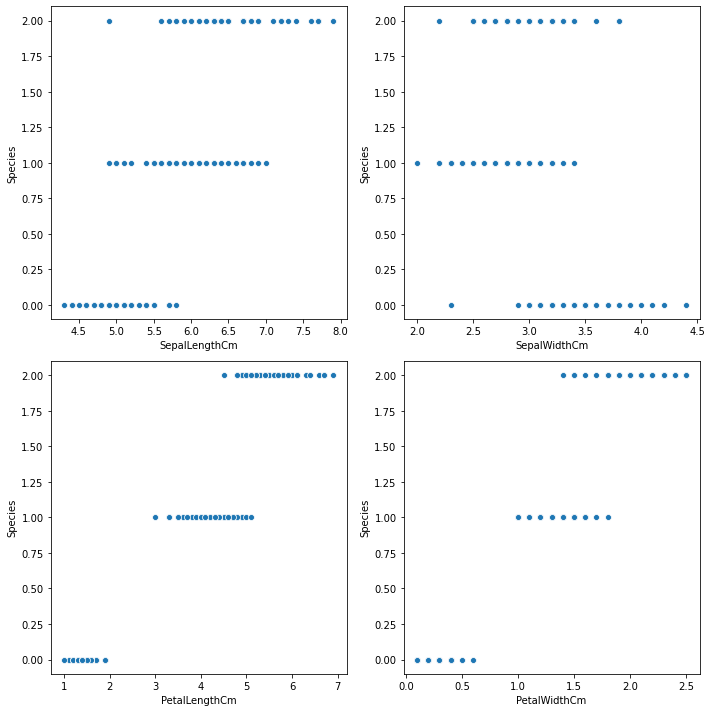

In [ ]:
### scatter 

plt.figure(figsize=(10,10))
plotnumber = 1

for col in df.columns[1:-1]:
    if plotnumber < 5:
        plt.subplot(2,2, plotnumber)
        sns.scatterplot(df[col], df['Species'])
    plotnumber +=1
plt.tight_layout()

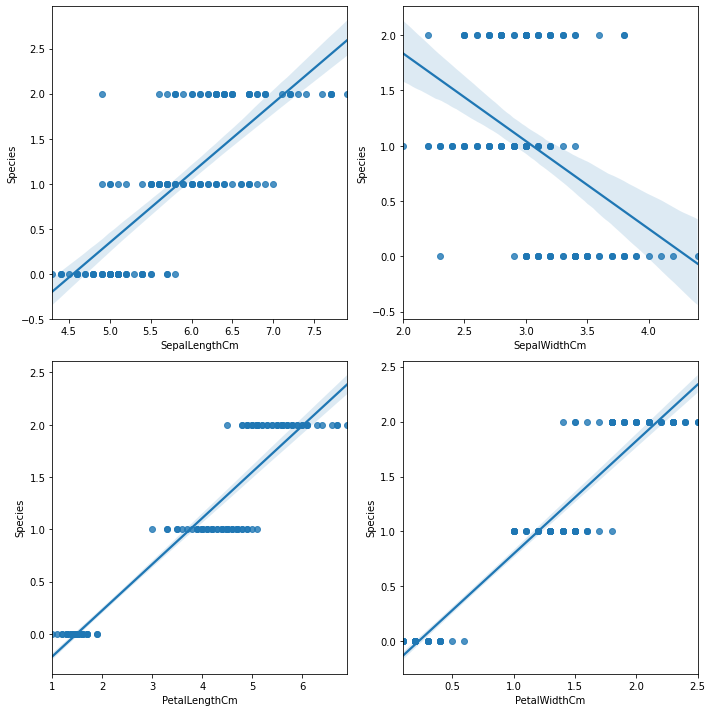

In [ ]:
### relplot 

plt.figure(figsize=(10,10))
plotnumber = 1

for col in df.columns[1:-1]:
    if plotnumber < 5:
        plt.subplot(2,2, plotnumber)
        sns.regplot(df[col], df['Species'])
    plotnumber +=1
plt.tight_layout()

In [ ]:
X = df.iloc[:, [1,2,3,4]].values
y = df['Species']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)

## Model Building

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
preds = clf.predict(X_test)
preds

array([0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 1])

In [ ]:
clf.score(X_test, y_test)

0.9666666666666667

## Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

matrix = confusion_matrix(y_test, preds)
matrix

array([[11,  0,  0],
       [ 0,  7,  0],
       [ 0,  1, 11]])

In [ ]:
score = accuracy_score(y_test, preds)

In [ ]:
print('Score : ', score)

Score :  0.9666666666666667


### Predict the Class by features

In [ ]:
result = clf.predict([[1,6,5,0.2]])

if result[0] == 0:
    print('Predicted Class is :', 'Setosa')
elif result[0] == 1:
    print('Predicted Class is :', 'Versicolor')
elif result[0] == 2:
    print('Predicted Class is :', 'Virginica')

Predicted Class is : Setosa


### Let us visualize the Decision Tree to understand it better.

In [ ]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y
!pip install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


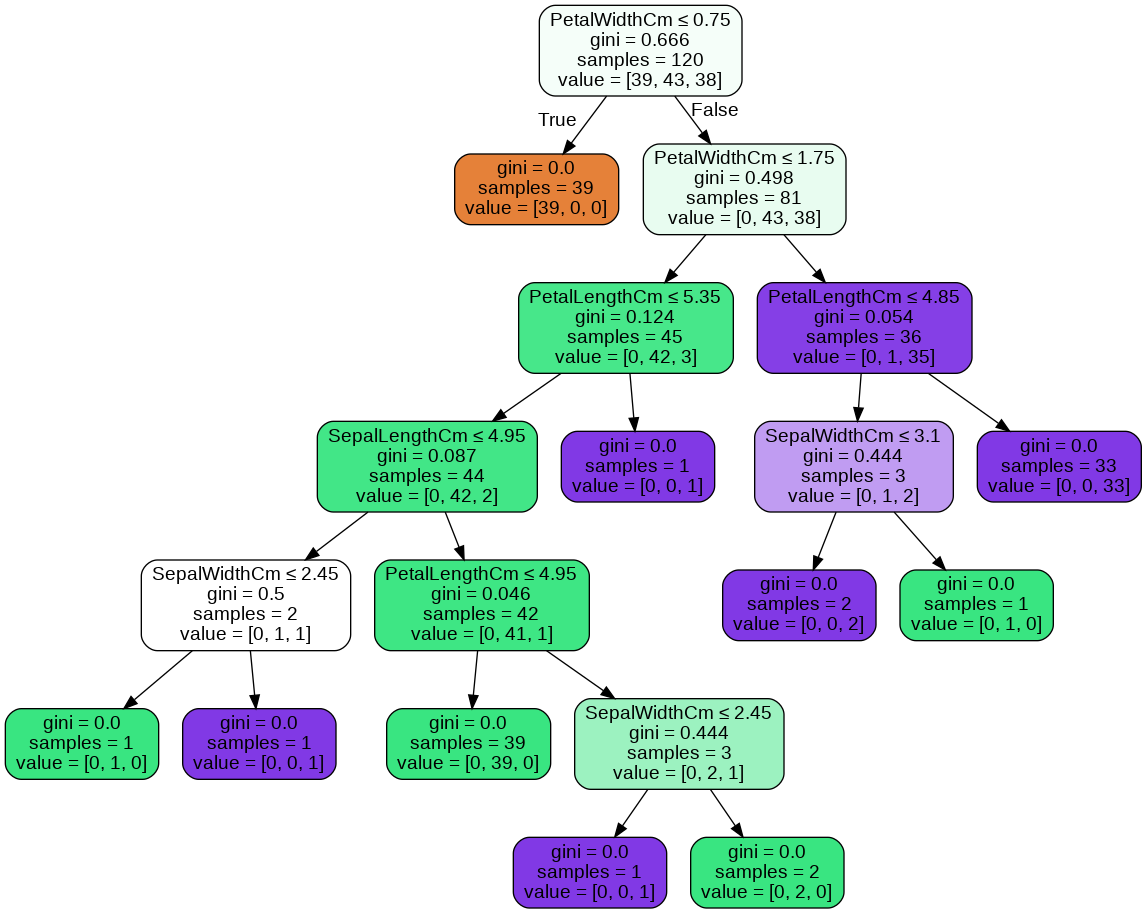

In [ ]:
#Import necessary libraries for graph viz

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

# Visualize the graph
\
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=df.columns[1:-1], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())